# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df = merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
merged_df["Tumor Volume (mm3)"] = round(merged_df["Tumor Volume (mm3)"], 1)
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,k403,5,38.8,0,Ramicane,Male,21,16
2,k403,10,35.0,1,Ramicane,Male,21,16
3,k403,15,34.2,1,Ramicane,Male,21,16
4,k403,20,33.0,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
num_unique_mice = merged_df["Mouse ID"].nunique()
print(f"Number of unique mice: {num_unique_mice}")


Number of unique mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate Mice IDs:")
print(duplicate_mice["Mouse ID"].unique())


Duplicate Mice IDs:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = "g989"
duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == duplicate_mouse_id]
print(f"All data for mouse ID {duplicate_mouse_id}:")
duplicate_mouse_data


All data for mouse ID g989:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.0,0,Propriva,Female,21,26
909,g989,0,45.0,0,Propriva,Female,21,26
910,g989,5,48.8,0,Propriva,Female,21,26
911,g989,5,47.6,0,Propriva,Female,21,26
912,g989,10,51.7,0,Propriva,Female,21,26
913,g989,10,49.9,0,Propriva,Female,21,26
914,g989,15,51.3,1,Propriva,Female,21,26
915,g989,15,53.4,0,Propriva,Female,21,26
916,g989,20,55.3,1,Propriva,Female,21,26
917,g989,20,54.7,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop(index=merged_df.loc[merged_df["Mouse ID"] == duplicate_mouse_id].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,k403,5,38.8,0,Ramicane,Male,21,16
2,k403,10,35.0,1,Ramicane,Male,21,16
3,k403,15,34.2,1,Ramicane,Male,21,16
4,k403,20,33.0,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.1,2,Naftisol,Male,9,30
1889,z969,30,65.8,3,Naftisol,Male,9,30
1890,z969,35,69.2,4,Naftisol,Male,9,30
1891,z969,40,70.3,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.

num_mice = len(clean_df["Mouse ID"].unique())
print(f"There are {num_mice} unique mice in the clean DataFrame.")


There are 248 unique mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = clean_df.groupby("Drug Regimen")

tumor_mean = drug_group["Tumor Volume (mm3)"].mean()
tumor_median = drug_group["Tumor Volume (mm3)"].median()
tumor_variance = drug_group["Tumor Volume (mm3)"].var()
tumor_stddev = drug_group["Tumor Volume (mm3)"].std()
tumor_sem = drug_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_stddev,
    "Tumor Volume Std. Err.": tumor_sem
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.320946,50.45,43.887926,6.624796,0.544555
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


In [8]:
# Using the agg method, produce the same summary statistics in a single line
summary_stats = (clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
                 .agg(['mean', 'median', 'var', 'std', 'sem']))

# Rename the columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume (mm3)',
    'median': 'Median Tumor Volume (mm3)',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics table
summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.320946,50.45,43.887926,6.624796,0.544555
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby('Drug Regimen').agg(
    {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}
)
summary_stats

Tumor Volume (mm3)                                      
                           mean median        var       std       sem
Drug Regimen                                                         
Capomulin             40.678261  41.55  24.954809  4.995479  0.329392
Ceftamin              52.589326  51.80  39.254292  6.265325  0.469606
Infubinol             52.885955  51.80  43.074321  6.563103  0.491925
Ketapril              55.237766  53.70  68.553379  8.279697  0.603859
Naftisol              54.330108  52.50  66.178440  8.135013  0.596488
Placebo               54.032044  52.30  61.148079  7.819724  0.581235
Propriva              52.320946  50.45  43.887926  6.624796  0.544555
Ramicane              40.217982  40.70  23.472054  4.844797  0.320854
Stelasyn              54.235359  52.40  59.453965  7.710640  0.573127
Zoniferol             53.236813  51.80  48.524770  6.965972  0.516352

## Bar and Pie Charts

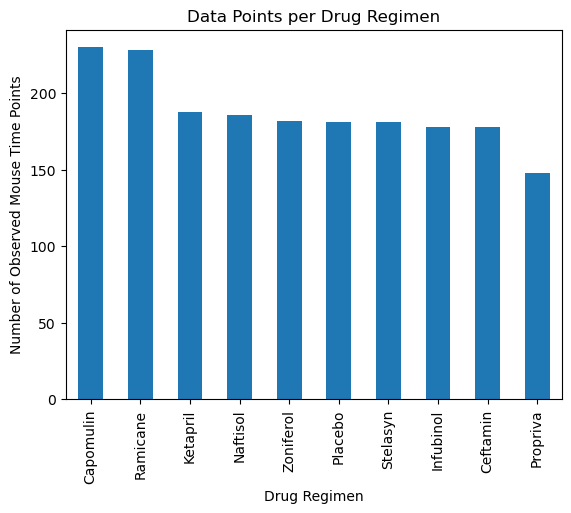

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_df['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Time Points')
plt.title('Data Points per Drug Regimen')

plt.show()


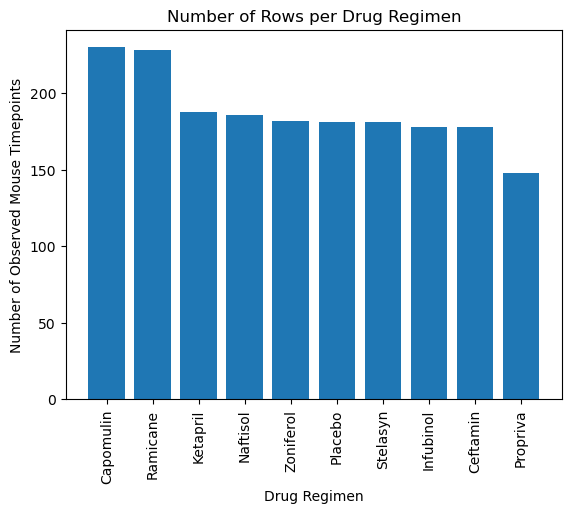

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

rows_per_regimen = clean_df['Drug Regimen'].value_counts()

plt.bar(rows_per_regimen.index, rows_per_regimen.values)
plt.xticks(rotation=90)

plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

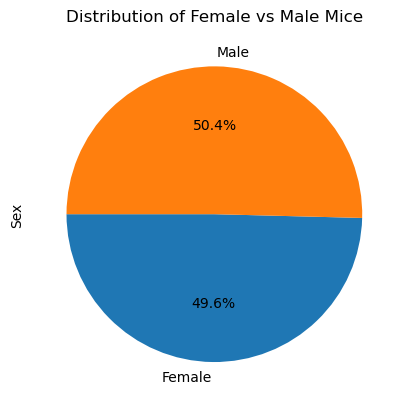

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = clean_df.groupby('Sex')['Mouse ID'].nunique()

gender_count.plot.pie(autopct='%1.1f%%', startangle=180)

plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')


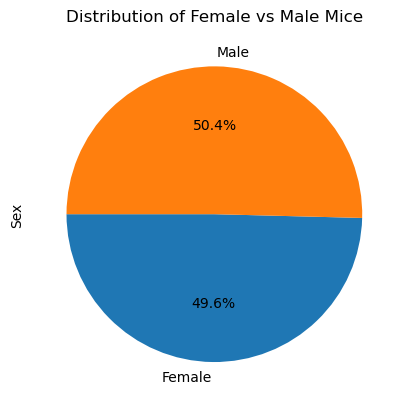

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = clean_df.groupby('Sex')['Mouse ID'].nunique()

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=180)

plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


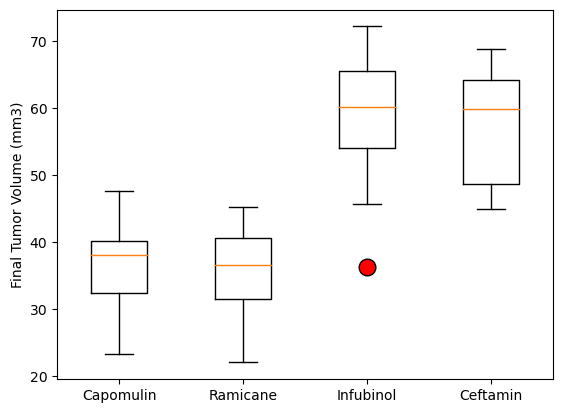

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

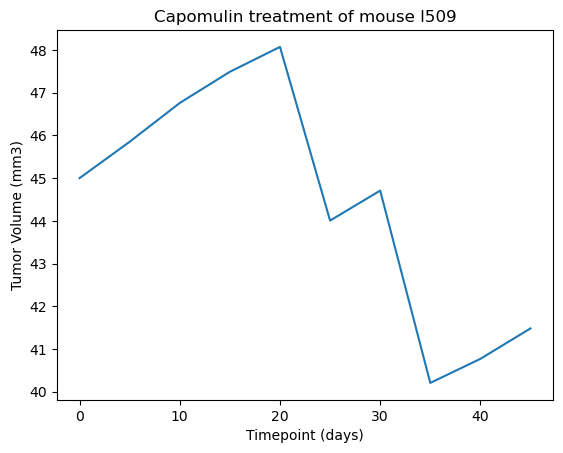

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


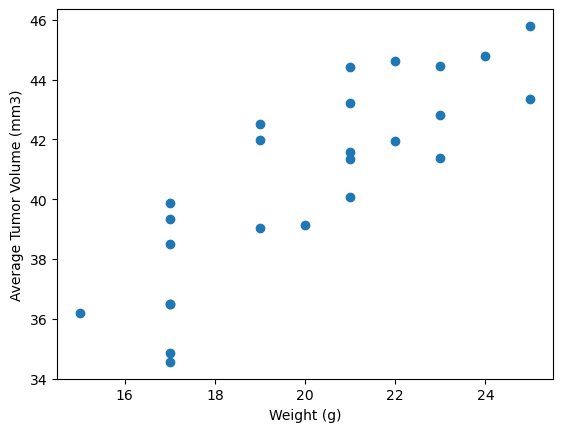

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


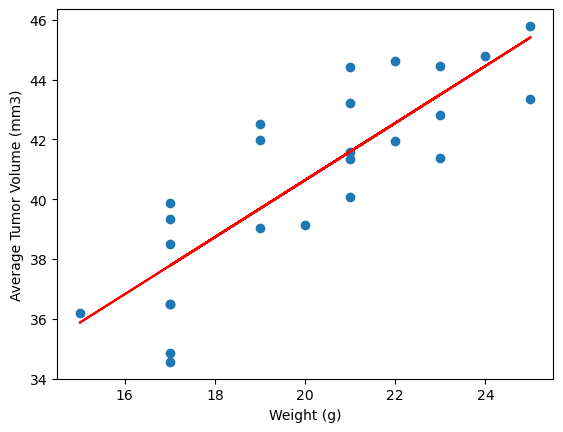

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
